In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score


import warnings
warnings.filterwarnings('ignore')

# <font color='#0000FF'>Table of Contents</font>

[1 : Exploring the data](#1)

[2 : Visualisation of variable target 'HadHeartAttack](#2)

[3 : Normalization of variables for modeling](#3)

<p style="padding:10px;background-color:#B9B7BD;margin:0;color:#000C66;font-family:sans serif;font-size:240%;text-align:center; overflow:hidden; font-weight:500; font-style:italic"><a id='1'></a>1. Exploring the data</p>

<p style="text-align:center; "></p>

Data exploration is a crucial step in the data analysis process. This phase allows for understanding the nature of the data, identifying trends, patterns, and laying the groundwork for more in-depth analyses. Here are some steps and techniques commonly used during data exploration:

- Understanding the Data: start by examining basic data features such as dataset size, variable types, and the initial rows to gain an initial overview.

- Descriptive Statistics: calculate descriptive statistics like mean, median, standard deviation, etc., to get an idea of the distribution of numerical variables.

- Visualization: Use graphs to visualize the data. Histograms, box plots, and scatter plots are useful for understanding the distribution, dispersion, and relationships between variables.

- Correlation Analysis: explore the relationships between variables by calculating correlations. This can reveal interesting associations or potential collinearities.

- Segmentation: if the data allows, perform segmentation to identify homogeneous subgroups. This can help tailor analyses based on specific characteristics.

- Preliminary Statistical Tests: if needed, conduct preliminary statistical tests to assess normality, equality of variances, etc.

In [2]:
df = pd.read_csv('heart_disease_2022_cleaned.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [4]:
df.shape

(246022, 40)

In [5]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [6]:
for column_content in df.columns:
    print(column_content)
    print(df[column_content].unique(),"\n")  

State
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands'] 

Sex
['Female' 'Male'] 

GeneralHealth
['Very good' 'Fair' 'Good' 'Excellent' 'Poor'] 

PhysicalHealthDays
[ 4.  0.  5.  3.  2. 25. 30. 15. 29.  8. 16. 20. 10.  9.  7.  1. 21.  6.
 27. 14. 12. 11. 13. 28. 17. 23. 24. 26. 18. 22. 19.] 

MentalHealthDays
[ 0. 15.  4. 25.  5. 30. 27.  3.  2.  1. 10. 20. 21.  6.  7.  8. 14.  9.
 12. 18. 29. 28. 17. 11

We have 40 variables, both categorical and quantitative. Several of them are objects that contain different types of information. We have closed Yes or No responses, evaluation responses, quantity responses, etc. Regarding the Float variables, it is very heterogeneous, which is understandable given the nature of each variable. 

- Therefore, it is necessary to standardize and normalize all these data for predictive modeling


#### I will not present visualizations in this notebook as I have already done so in another notebook for the same dataframe LINK. Here, I will primarily focus on machine learning modeling. If you're interested, you can refer to my previous notebook to see how the data is distributed through various visualizations.

<p style="padding:10px;background-color:#B9B7BD;margin:0;color:#000C66;font-family:sans serif;font-size:240%;text-align:center; overflow:hidden; font-weight:500; font-style:italic"><a id='2'></a>2. Visualisation of variable target "HadHeartAttack"</p>

<p style="text-align:center; "></p>

In [25]:
df_hha = df['HadHeartAttack'].value_counts()
df_hha

0    232587
1     13435
Name: HadHeartAttack, dtype: int64

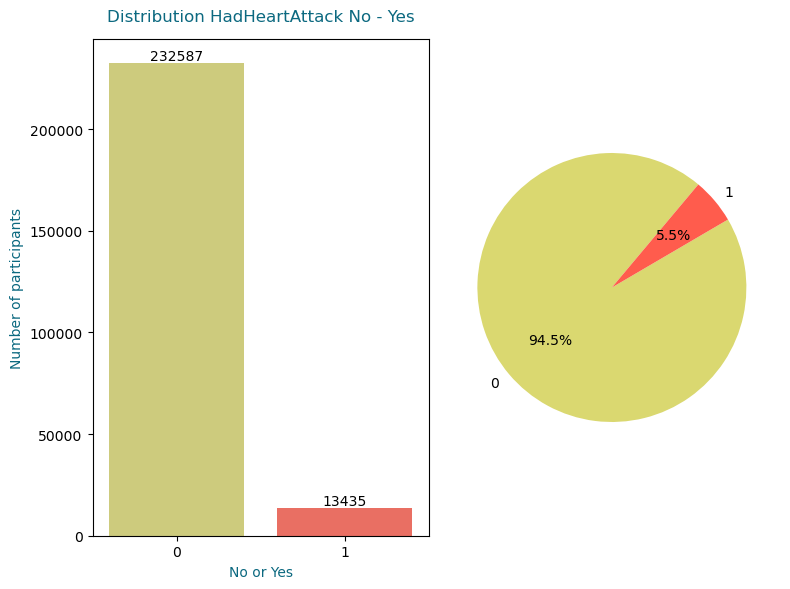

In [26]:
fig, (ax1, ax2) =plt.subplots(1,2, figsize=(8,6), dpi=100)
cols = ['#FF5C4D' if x < (max(df_hha)) else '#DAD870' for x in df_hha]

ax1 = sns.barplot(x=df_hha.index, y=df_hha, palette= cols, ax=ax1, )
for i in ax1.containers:
    ax1.bar_label(i,)
ax1.set_xlabel('No or Yes', color='#0C6980')
ax1.set_ylabel("Number of participants", color='#0C6980')
ax1.set_title("Distribution HadHeartAttack No - Yes", y=1.02, color='#0C6980')
plt.tight_layout()

ax2 = plt.pie(df_hha.values, labels=df_hha.index, autopct='%1.1f%%', startangle=50, colors= ['#DAD870', '#FF5C4D'])
plt.tight_layout()
plt.draw()


<p style="padding:10px;background-color:#B9B7BD;margin:0;color:#000C66;font-family:sans serif;font-size:240%;text-align:center; overflow:hidden; font-weight:500; font-style:italic"><a id='2'></a>3. Normalization of variables for modeling</p>

<p style="text-align:center; "></p>

There will be a first step to transform categorical variables into numerical. I will use Replace() and lambda(). 

Then, there will be normalization of numerical variables with MinMaxScaler(), which will be done once the data has been split (X_train and X_test) to avoid overfitting.

In [7]:
dict_replace = {'No':0, 'Yes' : 1} 
df = df.replace(dict_replace)

dict_GeneralHealth = {'Excellent': 0, 'Very good' : 1, 'Good' : 2, 'Fair': 3, 'Poor': 4}
df['GeneralHealth'] = df['GeneralHealth'].replace(dict_GeneralHealth)

dict_RemovedTeeth = {'None of them': 0, '1 to 5' : 1, '6 or more, but not all' : 2, 'All': 3}
df['RemovedTeeth'] = df['RemovedTeeth'].replace(dict_RemovedTeeth)

dict_HadDiabetes = {'No': 0, 'Yes' : 1, 'Yes, but only during pregnancy (female)' : 2, 
                    'No, pre-diabetes or borderline diabetes': 3}
df['HadDiabetes'] = df['HadDiabetes'].replace(dict_HadDiabetes)

dict_SmokerStatus = {'Never smoked': 0, 'Current smoker - now smokes some days' : 1, 
                     'Current smoker - now smokes every day' : 2, 'Former smoker': 3}
df['SmokerStatus'] = df['SmokerStatus'].replace(dict_SmokerStatus)

dict_ECigaretteUsage = {'Never used e-cigarettes in my entire life': 0, 
                        'Use them every day' : 1, 'Use them some days' : 2, 'Not at all (right now)': 3}
df['ECigaretteUsage'] = df['ECigaretteUsage'].replace(dict_ECigaretteUsage)

dict_TetanusLast10Tdap = {'Yes, received Tdap': 0,'Yes, received tetanus shot but not sure what type' : 1, 
                          'Yes, received tetanus shot, but not Tdap' : 2, 
                          'No, did not receive any tetanus shot in the past 10 years': 3}
df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].replace(dict_TetanusLast10Tdap)

dict_CovidPos = {'No': 0, 'Yes' : 1, 'Tested positive using home test without a health professional' : 2}
df['CovidPos'] = df['CovidPos'].replace(dict_CovidPos)

In [8]:
df['BMI'] = df['BMI'].apply(lambda x : 0 if x <= 24.9 else 1)
df['BMI'].value_counts()

1    173462
0     72560
Name: BMI, dtype: int64

In [9]:
df['Sex'] = df['Sex'].apply(lambda x : 0 if x == 'Female' else 1)
df['Sex'].value_counts()

0    127811
1    118211
Name: Sex, dtype: int64

In [10]:
df['RaceEthnicityCategory'] = df['RaceEthnicityCategory'].apply(lambda x : 0 if x =='White only, Non-Hispanic'else 1)
df['RaceEthnicityCategory'].value_counts()

0    186336
1     59686
Name: RaceEthnicityCategory, dtype: int64

In [11]:
df['AgeCategory'] = df['AgeCategory'].replace(to_replace = df['AgeCategory'].unique(), value =  np.arange(0,13,1))

In [12]:
for column_content in df.columns:
    print(column_content)
    print(df[column_content].unique(),"\n")  

State
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands'] 

Sex
[0 1] 

GeneralHealth
[1 3 2 0 4] 

PhysicalHealthDays
[ 4.  0.  5.  3.  2. 25. 30. 15. 29.  8. 16. 20. 10.  9.  7.  1. 21.  6.
 27. 14. 12. 11. 13. 28. 17. 23. 24. 26. 18. 22. 19.] 

MentalHealthDays
[ 0. 15.  4. 25.  5. 30. 27.  3.  2.  1. 10. 20. 21.  6.  7.  8. 14.  9.
 12. 18. 29. 28. 17. 11. 16. 13. 26. 22. 24. 19. 23.] 

LastCheckupTim

In [13]:
# Delete variables 'State' and 'LastCheckupTime' because they do not bring value.

df.drop(['State', 'LastCheckupTime'], axis=1, inplace= True)

<p style="padding:10px;background-color:#B9B7BD;margin:0;color:#000C66;font-family:sans serif;font-size:140%;text-align:left; overflow:hidden; font-weight:100; font-style:italic">Split the dataframe into X_train and X_test</p>

<p style="text-align:center; "></p>

In [14]:
feats= df.drop('HadHeartAttack', axis=1)

target = df['HadHeartAttack']

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2, train_size=0.8, random_state = 42)


Why normalize before modeling?

The main idea behind normalization/standardization is always the same. Variables measured on different scales do not contribute equally to the accuracy of the model and the function learned by the model, which could create bias. Thus, to address this potential issue, feature normalization, such as MinMax scaling, is generally used before model fitting.

The code is scaling the independent variables so that they lie in the range of 0 and 1. This is important because few variable values might be in thousands and few might be in small ranges. Hence to handle such cases scaling is important. 

Normalization or standardization is done after splitting the data to avoid overfitting of the model.

In [15]:
# MinMaxScaler 

scaled = MinMaxScaler()
X_train.loc[:, ['PhysicalHealthDays','MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms']] = scaled.fit_transform(X_train.loc[:, ['PhysicalHealthDays','MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms']])

X_test.loc[:, ['PhysicalHealthDays','MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms']] = scaled.fit_transform(X_test.loc[:, ['PhysicalHealthDays','MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms']])

<p style="padding:10px;background-color:#B9B7BD;margin:0;color:#000C66;font-family:sans serif;font-size:240%;text-align:center; overflow:hidden; font-weight:500; font-style:italic"><a id='3'></a>3. Applying the model Logistic Regression</p>

<p style="text-align:center; "></p>

Logistic Regression is a cornerstone in the field of machine learning, providing a robust framework for binary classification problems. 

#### What is Logistic Regression? 
Contrary to its name, Logistic Regression is a classification algorithm rather than a regression algorithm. Specifically designed for binary classification tasks, it predicts the probability that an instance belongs to a particular class. Despite the term "regression," it utilizes the logistic function (sigmoid) to constrain the output between 0 and 1.

#### Objective and Application: 
##### Binary Classification: 
Logistic Regression is widely used when the outcome variable is binary, meaning it has two classes. Examples include spam detection (spam or not spam), medical diagnosis (disease or no disease), and credit risk analysis (default or non-default).

#### Probability Estimation: 
Beyond simple classification, Logistic Regression provides probability estimates. Instead of a strict class assignment, it quantifies the probability that an instance belongs to a specific class. The model's performance is typically evaluated using metrics such as accuracy, precision, recall, and the area under the receiver operating characteristic (ROC) curve.

#### Conclusion: 
Logistic Regression is a powerful tool for binary classification problems, offering insights into the probability of an event occurring. By understanding its calculations, outputs, and interpretation, practitioners can effectively leverage Logistic Regression in diverse applications, from healthcare to finance.

In [18]:
mod_logReg = LogisticRegression()
mod_logReg.fit(X_train, y_train)

print('Le score de LogisticRegress sur le jeu TRAIN :', mod_logReg.score(X_train, y_train))

print('Le score de LogisticRegress sur le jeu TEST :', mod_logReg.score(X_test, y_test))

Le score de LogisticRegress sur le jeu TRAIN : 0.9480989955135989
Le score de LogisticRegress sur le jeu TEST : 0.9491108627172036


In [20]:
y_pred_train_lr = mod_logReg.predict(X_train)

y_pred_lr = mod_logReg.predict(X_test)
y_true = y_test

In [21]:
score_mod_logReg_train = mod_logReg.score(X_train, y_train)
mae_mod_logReg_train = mean_absolute_error(y_train,y_pred_train_lr)
mse_mod_logReg_train = mean_squared_error(y_train,y_pred_train_lr,squared=True)
rmse_mod_logReg_train = mean_squared_error(y_train,y_pred_train_lr,squared=False)

score_mod_logReg_test = mod_logReg.score(X_test, y_test)
mae_mod_logReg_test = mean_absolute_error(y_test,y_pred_lr)
mse_mod_logReg_test = mean_squared_error(y_test,y_pred_lr,squared=True)
rmse_mod_logReg_test = mean_squared_error(y_test,y_pred_lr,squared=False)

metrics_scaled = pd.DataFrame({'Score train': score_mod_logReg_train,'Score test': score_mod_logReg_test, 
                             'MAE train': mae_mod_logReg_train, 'MAE test' : mae_mod_logReg_test, 
                             'MSE train' : mse_mod_logReg_train, 'MSE test' : mse_mod_logReg_test,
                             'RMSE train' : rmse_mod_logReg_train, 'RMSE test' : rmse_mod_logReg_test},
                            index = ['Logistic Regression'])

metrics_scaled

,Score train,Score test,MAE train,MAE test,MSE train,MSE test,RMSE train,RMSE test
Logistic Regression,0.948099,0.949111,0.051901,0.050889,0.051901,0.050889,0.227818,0.225586


##### The Train score of 0.94 demonstrates the accuracy of the Logistic Regression model on our data. The accuracy is nearly perfect. As you can see in the results, the scores are very close and high.

When looking at the MAE and MSE scores, the model's margin of error is extremely minimal, if not practically nonexistent. At 0.05 points, the average differences between true values and predicted values are almost imperceptible. For our data, the closer to 0, the more accurate the model is. This is the case with Logistic Regression.

<p style="padding:10px;background-color:#B9B7BD;margin:0;color:#000C66;font-family:sans serif;font-size:140%;text-align:left; overflow:hidden; font-weight:100; font-style:italic">Confusion Matrix</p>

<p style="text-align:center; "></p>

A confusion matrix is a table that summarizes the performance of a classification model by comparing its predicted labels to the true labels. It displays the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) of the model's predictions.

A confusion matrix is a table that sums up the performance of a classification model. It works for binary and multi-class classification.
The confusion matrix shows the number of correct predictions: true positives (TP) and true negatives (TN). 
It also shows the model errors: false positives (FP) are “false alarms,” and false negatives (FN) are missed cases.
Using TP, TN, FP, and FN, you can calculate various classification quality metrics, such as precision and recall.

A classification model is a machine learning model that assigns predefined categories or classes (labels) to new input data. If you have only two classes, the classification is binary. If you have more, it is a multi-class problem. 

For our data, we have two cases: 
 1. Had a heart attack: predicting if the person had a heart attack (in data normalization, I transformed YES = 1). 
 2. No had a heart attack: predicting if the person did not have a heart attack (in data normalization, I transformed NO = 0). 
 
#### To understand the confusion matrix well : 
- TP - True Positive - represents people identified as No had a heart attack. 
- TN - True Negative - is the number of people the model predicted to have had a heart attack. 

So, my matrix should be read in this way.

In [22]:
display(pd.crosstab(y_true, y_pred_lr, rownames=['Classes réelles'], colnames=['Classes prédictes']))

Classes prédictes,0,1
Classes réelles,,
0,46079,494
1,2010,622


The matrix is based on the Test set, representing 49,205 rows on which the model trained.

In the confusion matrix, at the top-left, we have True Positives, which are 46,079 individuals correctly identified as not having had a heart attack. The model correctly predicted them as positive - TP No Had Heart Attack.

For True Negatives, located in the bottom-right corner of the matrix, we have 622 individuals detected as victims of a heart attack. TN = Had Heart Attack.

False Positives FP, found in the bottom-left corner of the matrix, represent the number of incorrectly predicted positive cases, i.e., 2010 cases that the model predicted as not having had a heart attack. In reality, these 2010 cases did experience a heart attack.

False Negatives FN, in the top-right corner of the matrix, represent the number of incorrectly predicted negatives. The model considers these 494 individuals to have had a heart attack, while their actual label is positive (No Had Heart Attack).

The false negative rate is crucial for the model's reliability. When it is low compared to the true positive rate, it indicates that the model is accurate. In our case, Logistic Regression applies accurately to our data.

In [24]:
#Classification report 

y_true = y_test

confusion_matrix(y_true, y_pred_lr)
class_report = classification_report(y_true, y_pred_lr)
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46573
           1       0.56      0.24      0.33      2632

    accuracy                           0.95     49205
   macro avg       0.76      0.61      0.65     49205
weighted avg       0.94      0.95      0.94     49205



#### The precision rate is 96%, which means that out of 46573 'NO HadHeartAttack' predictions, 96% are correct! 1863 possible errors, i.e. 0.04%. The 95% accuracy rate shows that the model is correct in 95% of cases. 